![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Round 7

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise.
Some approaches you can try in this exercise:

- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in rounds 2 to 7.

**Bonus**: Build a function, from round 2 and round 7, to clean and process the data.

### Explore the data

Done in the round 3.

### Modeling

Description:

- Try to improve the linear regression model.


# Lab | Customer Analysis Final Round

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

### 01 - Problem (case study)

- Data Description.
- Goal.

### 02 - Getting Data

- Read the `.csv` file.

### 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

### 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

### 05 - Modeling

- Apply model.

### 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

### 07 - Reporting

- Present results.


In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("lab-customer-analysis-round-7/files_for_lab/csv_files/marketing_customer_analysis.csv")

In [3]:
data = data.set_index("Customer")

In [4]:
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
data.shape

(9134, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null

In [7]:
#checking for NaNs
#also with Non_Null count available (see above)
data.isna().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [8]:
#checking for 0
data.isin([0]).sum()

State                               0
Customer Lifetime Value             0
Response                            0
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                           2317
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           314
Months Since Policy Inception      83
Number of Open Complaints        7252
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                       0
Vehicle Size                        0
dtype: int64

In [9]:
data.shape

(9134, 23)

In [10]:
#checking on duplicates
data=data.drop_duplicates()
data.shape

(8971, 23)

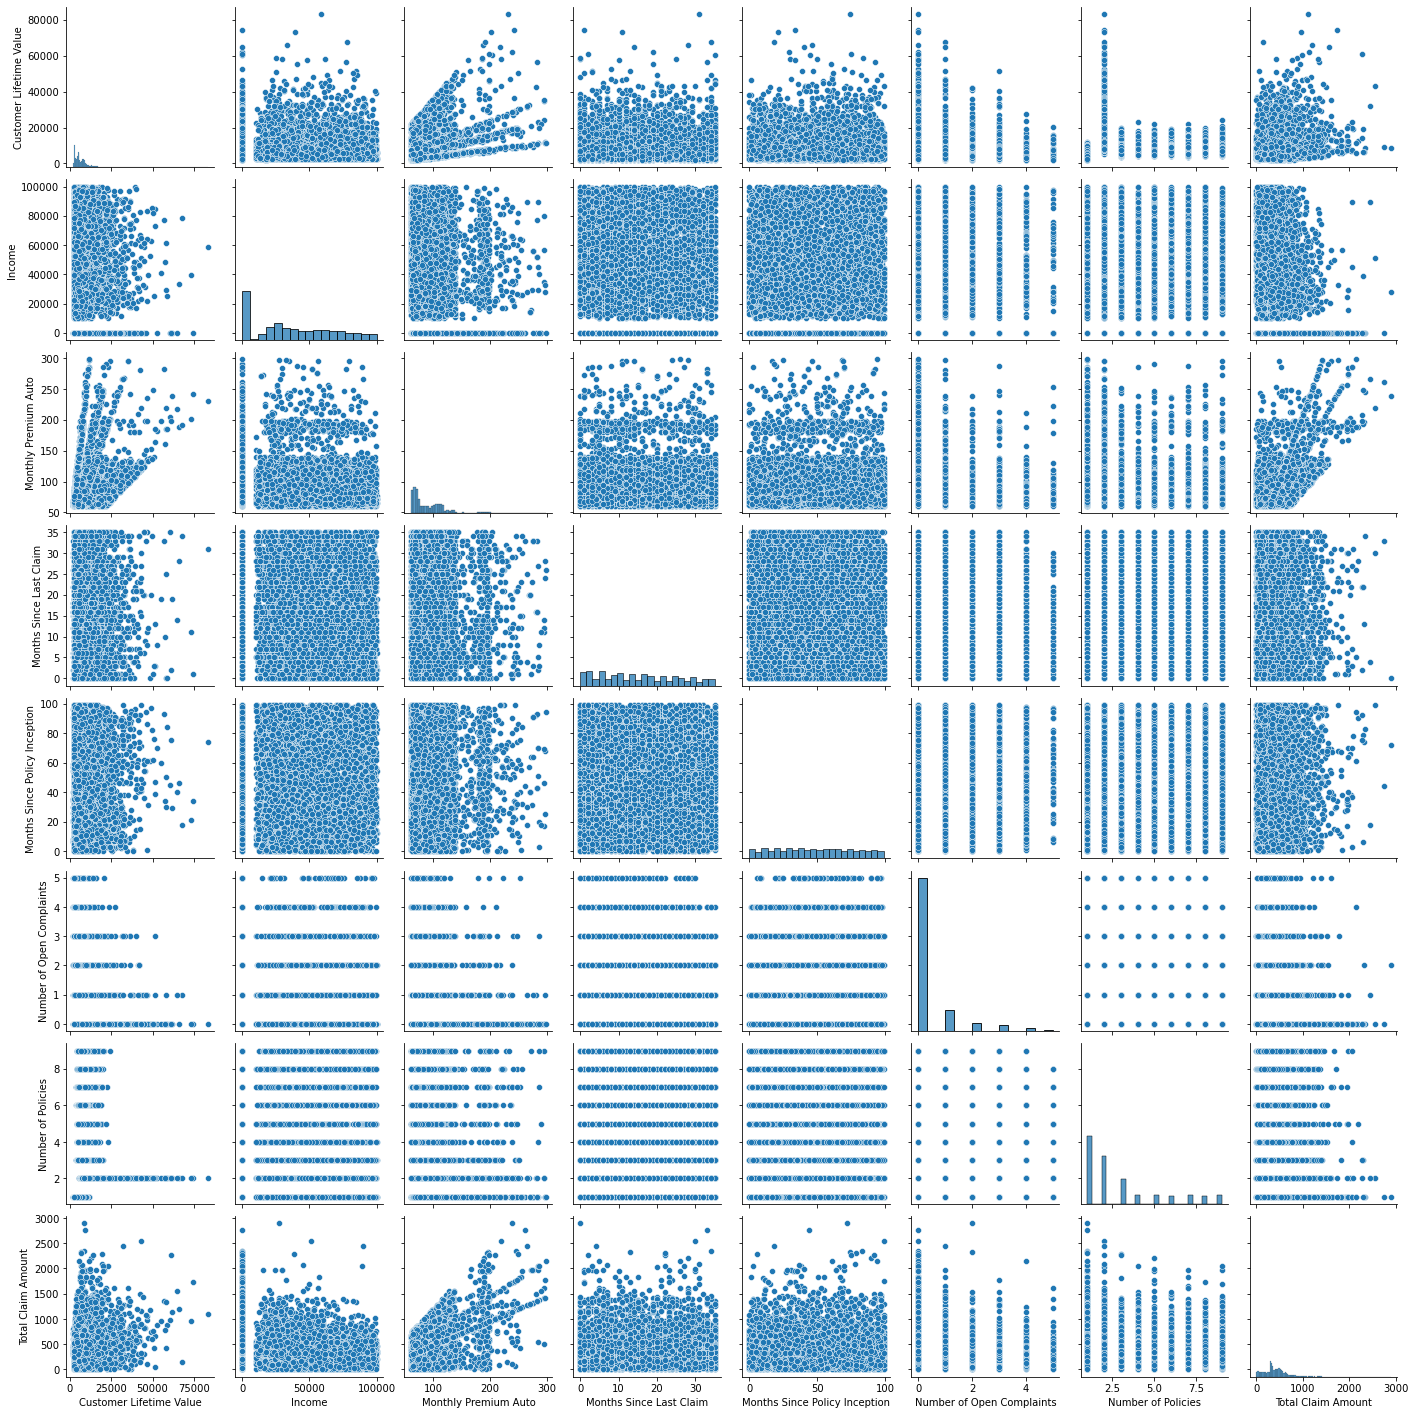

In [11]:
#checking for first indication of correlations

sns.pairplot(data)

In [12]:
#data._get_numeric_data()
#same as:
num=data.select_dtypes(np.number)

#cat=data.select_dtypes("object")
#same as:
cat=data.select_dtypes(np.object)

In [13]:
data.describe() #describe only works for numerical values

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000
mean,8004.192319,37644.828113,93.192621,15.099209,48.054175,0.385241,2.970349,433.886437
std,6867.941039,30431.741597,34.358960,10.077668,27.916442,0.909666,2.391832,291.074428
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3999.497700,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,270.472690
50%,5792.439588,33947.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.442328
75%,8954.637109,62365.500000,109.000000,23.000000,71.000000,0.000000,4.000000,547.988754
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [14]:
num_T=data.describe().T
num_T.head()

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,8971.0,8004.192319,6867.941039,1898.007675,3999.4977,5792.439588,8954.637109,83325.38119
Income,8971.0,37644.828113,30431.741597,0.000000,0.0000,33947.000000,62365.500000,99981.00000
Monthly Premium Auto,8971.0,93.192621,34.358960,61.000000,68.0000,83.000000,109.000000,298.00000
Months Since Last Claim,8971.0,15.099209,10.077668,0.000000,6.0000,14.000000,23.000000,35.00000
Months Since Policy Inception,8971.0,48.054175,27.916442,0.000000,24.0000,48.000000,71.000000,99.00000


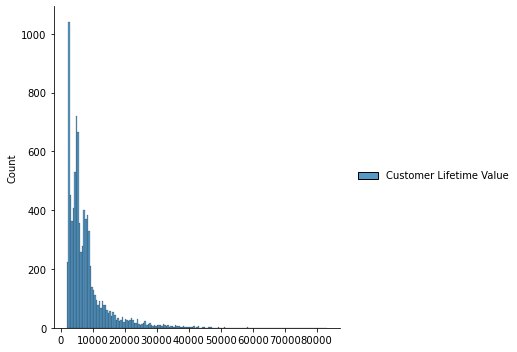

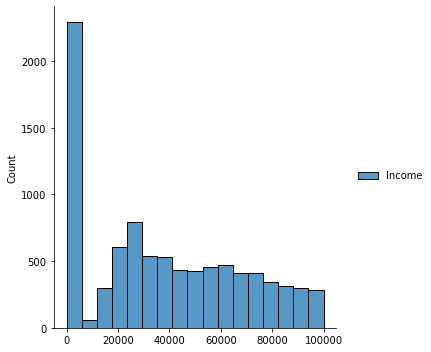

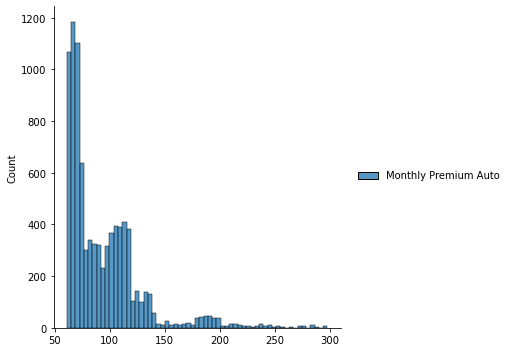

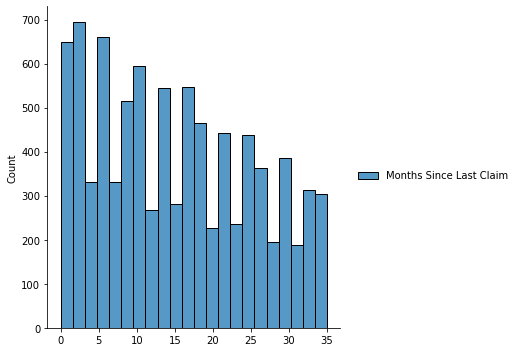

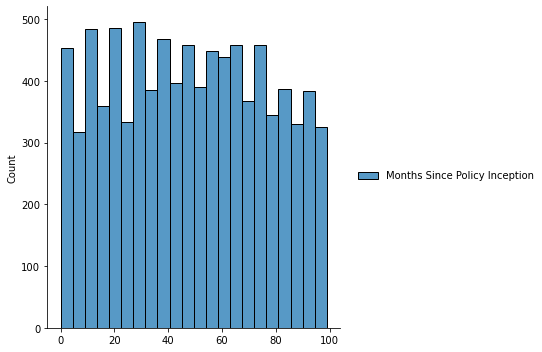

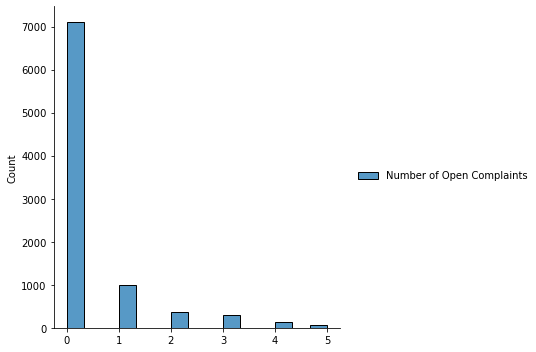

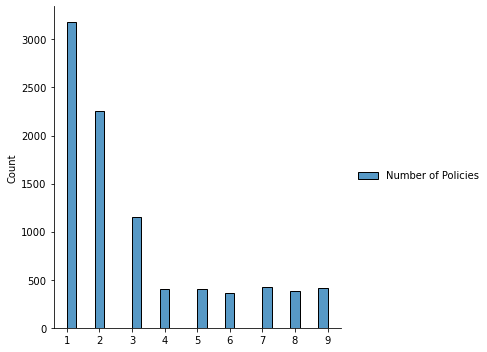

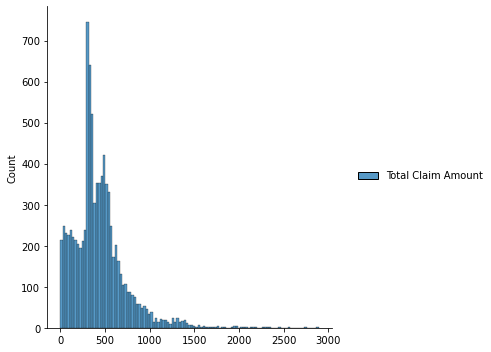

In [15]:
#Distribution of numerical values
import seaborn as sns
num_col=list(num.columns)

for i in num_col:
    sns.displot([num[i]])

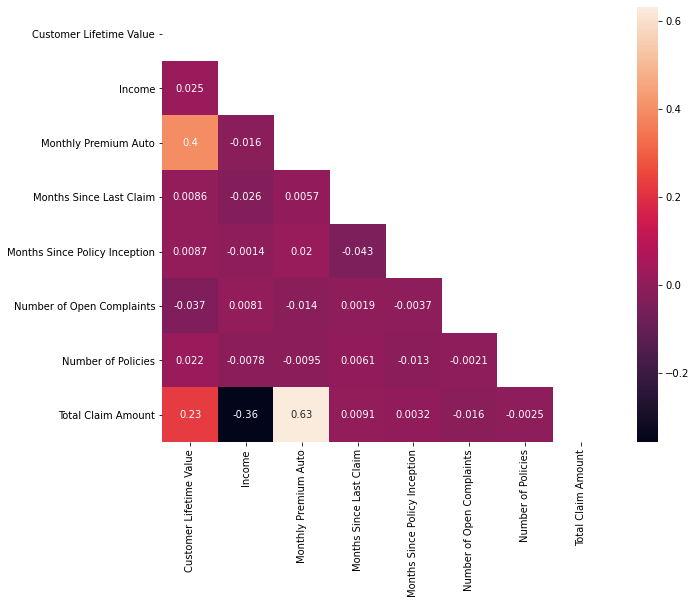

In [16]:
#checking correlation

correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [17]:
num_drop1=num.drop(["Customer Lifetime Value"],axis=1)

In [18]:
num_drop2=num.drop(["Income"],axis=1)

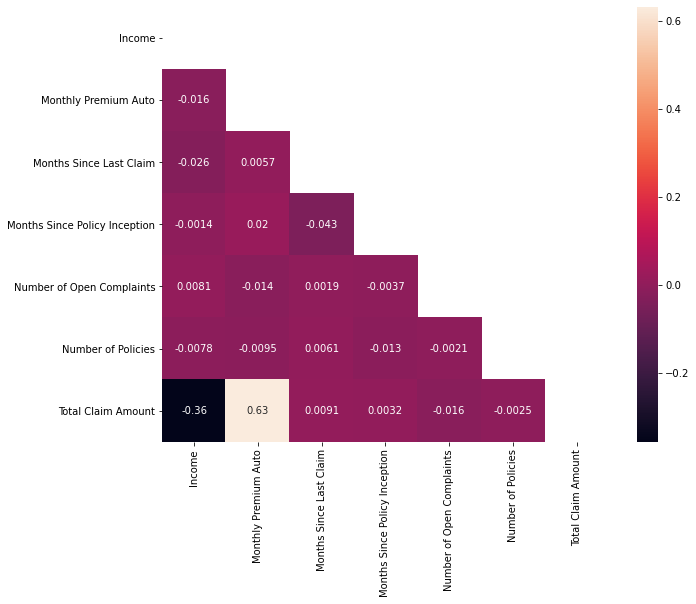

In [19]:
#checking correlation

correlations_matrix = num_drop1.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

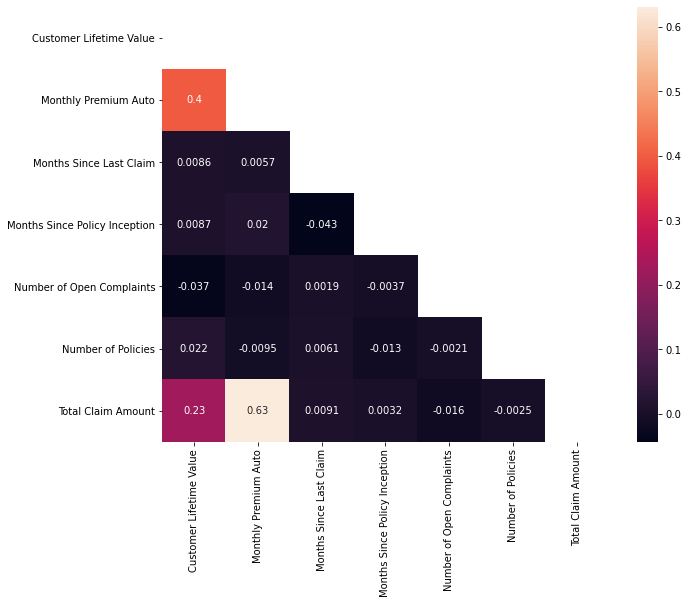

In [20]:
#checking correlation

correlations_matrix = num_drop2.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [21]:
data["Effective To Date"].unique()

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

In [22]:
#dropping data["Effective To Date"] because data is only from Jan/Feb 2011

In [23]:
cat.drop(["Effective To Date"],axis=1,inplace=True)

In [24]:
cat.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [25]:
#Define a function for boxplot the ordinals

def boxplot_ordinals(ordinal, target):
    df = pd.DataFrame(data= [cat[ordinal], data[target]])
    df = df.T
    sns.boxplot(x=ordinal, y=target, data=df)
    plt.show()
    return plt.show()

In [26]:
ordi=pd.DataFrame(columns=["Coverage","Education", "EmploymentStatus", "Vehicle Class", "Vehicle Size"],data=cat)
ordi.head()

,Coverage,Education,EmploymentStatus,Vehicle Class,Vehicle Size
Customer,,,,,
BU79786,Basic,Bachelor,Employed,Two-Door Car,Medsize
QZ44356,Extended,Bachelor,Unemployed,Four-Door Car,Medsize
AI49188,Premium,Bachelor,Employed,Two-Door Car,Medsize
WW63253,Basic,Bachelor,Unemployed,SUV,Medsize
HB64268,Basic,Bachelor,Employed,Four-Door Car,Medsize


Coverage


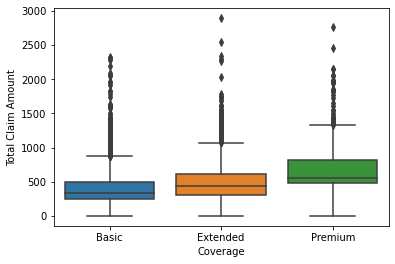

Education


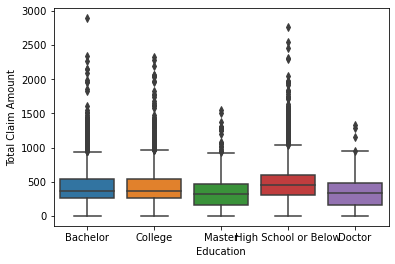

EmploymentStatus


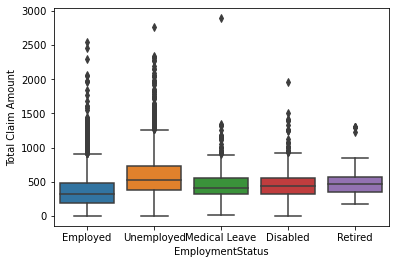

Vehicle Class


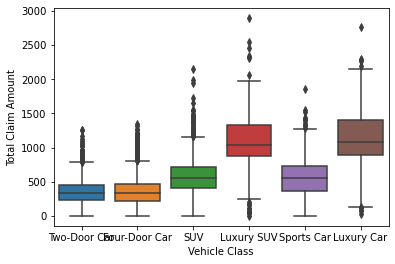

Vehicle Size


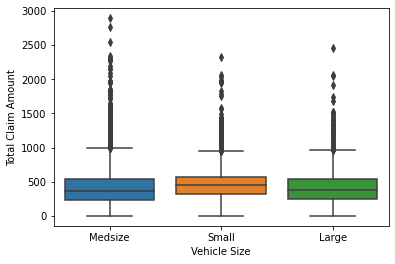

In [27]:
for i in list(ordi.columns):
    print(i)
    boxplot_ordinals(i,'Total Claim Amount')

In [28]:
coverage_dict = {'Basic':0,'Extended':1,'Premium':2}
ordi['Coverage'] = ordi['Coverage'].map(coverage_dict)
education_dict = {'High School or Below': 0, 'College':1, 'Bachelor':2,'Master':3,'Doctor':4}
ordi['Education'] = ordi['Education'].map(education_dict)
vehicle_class_dict = {'Two-Door Car':0, 'Four-Door Car':0, 'SUV':1, 'Luxury SUV':2, 'Sports Car':1,'Luxury Car':2}
ordi['Vehicle Class'] = ordi['Vehicle Class'].map(vehicle_class_dict)
vehicle_dict = {'Small':0,'Medsize':1,'Large':2 }
ordi['Vehicle Size'] = ordi['Vehicle Size'].map(vehicle_dict)

ordi.head()

,Coverage,Education,EmploymentStatus,Vehicle Class,Vehicle Size
Customer,,,,,
BU79786,0,2,Employed,0,1
QZ44356,1,2,Unemployed,0,1
AI49188,2,2,Employed,0,1
WW63253,0,2,Unemployed,1,1
HB64268,0,2,Employed,0,1


In [29]:
ordi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8971 entries, BU79786 to Y167826
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Coverage          8971 non-null   int64 
 1   Education         8971 non-null   int64 
 2   EmploymentStatus  8971 non-null   object
 3   Vehicle Class     8971 non-null   int64 
 4   Vehicle Size      8971 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 678.6+ KB


In [30]:
ordi.drop("EmploymentStatus",axis=1,inplace=True)
ordi.head()

,Coverage,Education,Vehicle Class,Vehicle Size
Customer,,,,
BU79786,0,2,0,1
QZ44356,1,2,0,1
AI49188,2,2,0,1
WW63253,0,2,1,1
HB64268,0,2,0,1


In [31]:
ordi.columns

Index(['Coverage', 'Education', 'Vehicle Class', 'Vehicle Size'], dtype='object')

In [32]:
cat.drop(list(ordi.columns),axis=1,inplace=True)

In [33]:
num=pd.concat([num, ordi],axis=1)
num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Coverage,Education,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147,0,2,0,1
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935,1,2,0,1
AI49188,12887.431650,48767,108,18,38,0,2,566.472247,2,2,0,1
WW63253,7645.861827,0,106,18,65,0,7,529.881344,0,2,1,1
HB64268,2813.692575,43836,73,12,44,0,1,138.130879,0,2,0,1


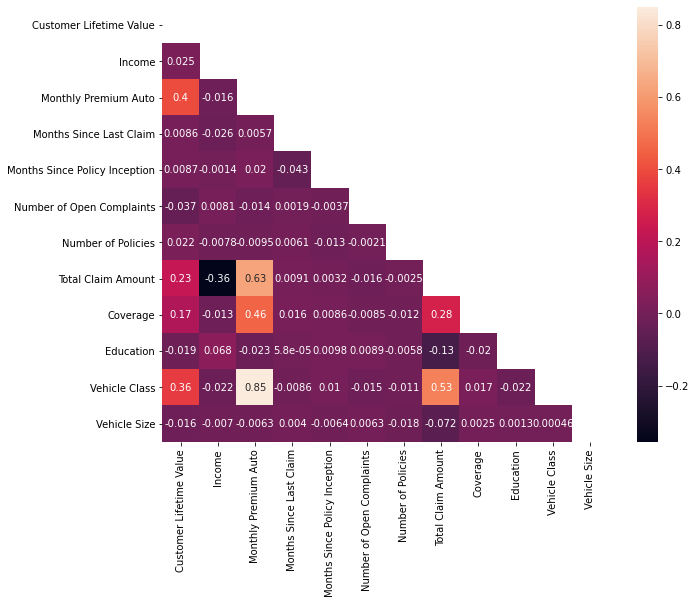

In [34]:
#checking correlation

correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [35]:
#Drop vehicle class or customer lifetime value?

In [36]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [37]:
num.apply(skew) #-2;2

Customer Lifetime Value          3.044303
Income                           0.286063
Monthly Premium Auto             2.115392
Months Since Last Claim          0.277878
Months Since Policy Inception    0.040910
Number of Open Complaints        2.774200
Number of Policies               1.250547
Total Claim Amount               1.720308
Coverage                         1.031274
Education                        0.506286
Vehicle Class                    1.434836
Vehicle Size                    -0.074166
dtype: float64

In [38]:
#x-y-split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

Y=num["Total Claim Amount"]
num_X=num.drop(["Total Claim Amount"],axis=1)

In [39]:
#OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

In [40]:
df_index=cat.index

encoder = OneHotEncoder(handle_unknown='error',drop="first").fit(cat) #en_x=array
encoder.categories_

encoded=encoder.transform(cat).toarray()
encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [41]:
cat_columns=encoder.get_feature_names()


In [42]:
cat_encoded=pd.DataFrame(data=encoded, columns=cat_columns,index=df_index)
cat_encoded.head()

,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_Employed,x2_Medical Leave,x2_Retired,x2_Unemployed,x3_M,x4_Suburban,x4_Urban,x5_Married,x5_Single,x6_Personal Auto,x6_Special Auto,x7_Corporate L2,x7_Corporate L3,x7_Personal L1,x7_Personal L2,x7_Personal L3,x7_Special L1,x7_Special L2,x7_Special L3,x8_Offer2,x8_Offer3,x8_Offer4,x9_Branch,x9_Call Center,x9_Web
Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
QZ44356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AI49188,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WW63253,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
HB64268,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
X=pd.concat([num_X,cat_encoded],axis=1)
X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Coverage,Education,Vehicle Class,Vehicle Size,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_Employed,x2_Medical Leave,x2_Retired,x2_Unemployed,x3_M,x4_Suburban,x4_Urban,x5_Married,x5_Single,x6_Personal Auto,x6_Special Auto,x7_Corporate L2,x7_Corporate L3,x7_Personal L1,x7_Personal L2,x7_Personal L3,x7_Special L1,x7_Special L2,x7_Special L3,x8_Offer2,x8_Offer3,x8_Offer4,x9_Branch,x9_Call Center,x9_Web
Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,0,2,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
QZ44356,6979.535903,0,94,13,42,0,8,1,2,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AI49188,12887.431650,48767,108,18,38,0,2,2,2,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WW63253,7645.861827,0,106,18,65,0,7,0,2,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
HB64268,2813.692575,43836,73,12,44,0,1,0,2,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
X.shape

(8971, 41)

In [45]:
Y.head()

Customer
BU79786     384.811147
QZ44356    1131.464935
AI49188     566.472247
WW63253     529.881344
HB64268     138.130879
Name: Total Claim Amount, dtype: float64

In [46]:
Y.shape

(8971,)

## Linear model number 1 with sklearn libary and StandardScaler

In [47]:
#Train-Test_split

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
#split

In [49]:
x_train.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Coverage,Education,Vehicle Class,Vehicle Size,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_Employed,x2_Medical Leave,x2_Retired,x2_Unemployed,x3_M,x4_Suburban,x4_Urban,x5_Married,x5_Single,x6_Personal Auto,x6_Special Auto,x7_Corporate L2,x7_Corporate L3,x7_Personal L1,x7_Personal L2,x7_Personal L3,x7_Special L1,x7_Special L2,x7_Special L3,x8_Offer2,x8_Offer3,x8_Offer4,x9_Branch,x9_Call Center,x9_Web
Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
XY33610,15695.539410,97750,65,15,51,0,2,0,1,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
RM83767,5970.995737,64008,85,9,66,5,5,1,1,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
TN54884,14932.099820,39049,63,30,34,0,2,0,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
CV40610,12313.164840,0,116,7,57,0,2,2,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
KB25170,2560.082499,88059,63,15,98,0,1,0,4,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [50]:
y_train.head()

Customer
XY33610    303.002922
RM83767    372.893812
TN54884    294.756260
CV40610    835.200000
KB25170    144.551024
Name: Total Claim Amount, dtype: float64

In [51]:
train_index=x_train.index
print(train_index)

Index(['XY33610', 'RM83767', 'TN54884', 'CV40610', 'KB25170', 'WH56217',
       'ZF40671', 'SM54018', 'VI34110', 'HN54181',
       ...
       'RN41087', 'EA27048', 'DG68667', 'DK81475', 'TU72516', 'RO30676',
       'OM82309', 'PR37714', 'AA56476', 'MM67983'],
      dtype='object', name='Customer', length=6279)


In [52]:
x_test.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Coverage,Education,Vehicle Class,Vehicle Size,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_Employed,x2_Medical Leave,x2_Retired,x2_Unemployed,x3_M,x4_Suburban,x4_Urban,x5_Married,x5_Single,x6_Personal Auto,x6_Special Auto,x7_Corporate L2,x7_Corporate L3,x7_Personal L1,x7_Personal L2,x7_Personal L3,x7_Special L1,x7_Special L2,x7_Special L3,x8_Offer2,x8_Offer3,x8_Offer4,x9_Branch,x9_Call Center,x9_Web
Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DQ10761,2315.094985,0,73,14,39,1,1,0,2,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
MQ93707,6747.524275,26721,65,18,64,3,2,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
DS50601,10003.247290,98192,84,2,64,1,2,1,2,0,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AP95078,7855.324623,37229,67,9,36,0,2,0,2,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
CW38361,8744.727173,61706,110,6,71,0,7,0,2,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [53]:
y_test.head()

Customer
DQ10761    350.400000
MQ93707    312.000000
DS50601    403.200000
AP95078    321.600000
CW38361    223.905524
Name: Total Claim Amount, dtype: float64

In [54]:
test_index=x_test.index
print(test_index)

Index(['DQ10761', 'MQ93707', 'DS50601', 'AP95078', 'CW38361', 'BM30720',
       'RA17555', 'WY53775', 'UK59933', 'FL96333',
       ...
       'HI36042', 'NA43540', 'VY75186', 'CK31454', 'HO81102', 'TA82973',
       'VN57368', 'GB35238', 'MZ65087', 'YQ79307'],
      dtype='object', name='Customer', length=2692)


In [55]:
#Scale Numericals (Normalizer or StandardScaler or MinMaxScaler)
#Different scaler have different impact on our values

## StandradScaler on train-test split

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
#Fitting the StandardScala to our x_train

scaler_x = StandardScaler().fit(x_train)

x_train_scaled=pd.DataFrame(scaler_x.transform(x_train),columns=X.columns,index=train_index)
x_train_scaled.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Coverage,Education,Vehicle Class,Vehicle Size,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_Employed,x2_Medical Leave,x2_Retired,x2_Unemployed,x3_M,x4_Suburban,x4_Urban,x5_Married,x5_Single,x6_Personal Auto,x6_Special Auto,x7_Corporate L2,x7_Corporate L3,x7_Personal L1,x7_Personal L2,x7_Personal L3,x7_Special L1,x7_Special L2,x7_Special L3,x8_Offer2,x8_Offer3,x8_Offer4,x9_Branch,x9_Call Center,x9_Web
Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
XY33610,1.100771,1.968738,-0.822668,-0.009394,0.104826,-0.420371,-0.404216,-0.735767,-0.263998,-0.601256,0.158290,-0.718031,-0.331886,-0.628262,3.183234,-0.378274,0.775485,-0.218454,-0.16732,-0.586239,1.009119,-1.299646,2.160317,-1.170228,-0.618902,0.594334,-0.214016,-0.262579,-0.355356,-0.396492,-0.544036,1.291708,-0.084962,-0.140176,-0.132914,1.470249,-0.437563,-0.355640,-0.619886,-0.491324,-0.415917
RM83767,-0.290961,0.861855,-0.243163,-0.604229,0.642747,5.046717,0.852256,0.778452,-0.263998,-0.601256,0.158290,-0.718031,-0.331886,-0.628262,3.183234,-0.378274,0.775485,-0.218454,-0.16732,-0.586239,1.009119,-1.299646,2.160317,-1.170228,1.615765,0.594334,-0.214016,-0.262579,-0.355356,-0.396492,-0.544036,1.291708,-0.084962,-0.140176,-0.132914,-0.680157,2.285387,-0.355640,-0.619886,-0.491324,-0.415917
TN54884,0.991511,0.043092,-0.880619,1.477692,-0.504818,-0.420371,-0.404216,-0.735767,-0.263998,-0.601256,0.158290,1.392698,-0.331886,-0.628262,-0.314146,-0.378274,0.775485,-0.218454,-0.16732,-0.586239,-0.990963,-1.299646,2.160317,0.854534,-0.618902,0.594334,-0.214016,-0.262579,-0.355356,-0.396492,1.838113,-0.774169,-0.084962,-0.140176,-0.132914,1.470249,-0.437563,-0.355640,-0.619886,-0.491324,-0.415917
CV40610,0.616701,-1.237883,0.655070,-0.802507,0.319994,-0.420371,-0.404216,2.292671,-0.263998,-0.601256,0.158290,1.392698,-0.331886,-0.628262,-0.314146,-0.378274,-1.289515,-0.218454,-0.16732,1.705788,1.009119,0.769440,-0.462895,-1.170228,1.615765,0.594334,-0.214016,-0.262579,-0.355356,2.522118,-0.544036,-0.774169,-0.084962,-0.140176,-0.132914,-0.680157,-0.437563,-0.355640,-0.619886,2.035315,-0.415917
KB25170,-0.779115,1.650831,-0.880619,-0.009394,1.790312,-0.420371,-0.823041,-0.735767,2.536075,-0.601256,-1.706439,-0.718031,-0.331886,-0.628262,3.183234,-0.378274,0.775485,-0.218454,-0.16732,-0.586239,-0.990963,-1.299646,-0.462895,0.854534,-0.618902,0.594334,-0.214016,-0.262579,-0.355356,2.522118,-0.544036,-0.774169,-0.084962,-0.140176,-0.132914,-0.680157,-0.437563,2.811829,-0.619886,2.035315,-0.415917


In [58]:
x_test_scaled=pd.DataFrame(scaler_x.transform(x_test),columns=X.columns,index=test_index)
x_test_scaled.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Coverage,Education,Vehicle Class,Vehicle Size,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_Employed,x2_Medical Leave,x2_Retired,x2_Unemployed,x3_M,x4_Suburban,x4_Urban,x5_Married,x5_Single,x6_Personal Auto,x6_Special Auto,x7_Corporate L2,x7_Corporate L3,x7_Personal L1,x7_Personal L2,x7_Personal L3,x7_Special L1,x7_Special L2,x7_Special L3,x8_Offer2,x8_Offer3,x8_Offer4,x9_Branch,x9_Call Center,x9_Web
Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DQ10761,-0.814177,-1.237883,-0.590866,-0.108534,-0.325511,0.673047,-0.823041,-0.735767,0.669360,-0.601256,0.158290,-0.718031,-0.331886,1.591692,-0.314146,-0.378274,-1.289515,-0.218454,-0.16732,1.705788,1.009119,0.769440,-0.462895,-1.170228,1.615765,-1.682556,-0.214016,-0.262579,2.814078,-0.396492,-0.544036,-0.774169,-0.084962,-0.140176,-0.132914,-0.680157,-0.437563,-0.355640,1.613199,-0.491324,-0.415917
MQ93707,-0.179828,-0.361319,-0.822668,0.288023,0.571024,2.859882,-0.404216,-0.735767,-1.197355,-0.601256,0.158290,-0.718031,-0.331886,1.591692,-0.314146,-0.378274,-1.289515,-0.218454,-0.16732,-0.586239,1.009119,0.769440,-0.462895,-1.170228,-0.618902,0.594334,-0.214016,-0.262579,-0.355356,-0.396492,1.838113,-0.774169,-0.084962,-0.140176,-0.132914,1.470249,-0.437563,-0.355640,-0.619886,-0.491324,-0.415917
DS50601,0.286116,1.983237,-0.272138,-1.298203,0.571024,0.673047,-0.404216,0.778452,0.669360,-0.601256,2.023019,-0.718031,3.013080,-0.628262,-0.314146,-0.378274,0.775485,-0.218454,-0.16732,-0.586239,1.009119,0.769440,-0.462895,0.854534,-0.618902,0.594334,-0.214016,-0.262579,-0.355356,-0.396492,-0.544036,1.291708,-0.084962,-0.140176,-0.132914,-0.680157,-0.437563,-0.355640,-0.619886,-0.491324,-0.415917
AP95078,-0.021285,-0.016612,-0.764718,-0.604229,-0.433096,-0.420371,-0.404216,-0.735767,0.669360,-0.601256,0.158290,-0.718031,-0.331886,1.591692,-0.314146,-0.378274,0.775485,-0.218454,-0.16732,-0.586239,1.009119,0.769440,-0.462895,0.854534,-0.618902,0.594334,-0.214016,-0.262579,-0.355356,-0.396492,1.838113,-0.774169,-0.084962,-0.140176,-0.132914,-0.680157,-0.437563,2.811829,1.613199,-0.491324,-0.415917
CW38361,0.106003,0.786339,0.481218,-0.901646,0.822054,-0.420371,1.689905,-0.735767,0.669360,1.235866,-1.706439,1.392698,-0.331886,-0.628262,-0.314146,-0.378274,0.775485,-0.218454,-0.16732,-0.586239,1.009119,-1.299646,-0.462895,0.854534,-0.618902,-1.682556,-0.214016,-0.262579,2.814078,-0.396492,-0.544036,-0.774169,-0.084962,-0.140176,-0.132914,-0.680157,2.285387,-0.355640,-0.619886,2.035315,-0.415917


In [59]:
#Linear Regression
lm=linear_model.LinearRegression()
model=lm.fit(x_train_scaled,y_train)
predictions=lm.predict(x_test_scaled)
round(r2_score(y_test,predictions),5)

0.78234

In [60]:
predictions

array([548.59039609, 393.45389966, 413.59448228, ..., 336.46539609,
         7.06527421, 175.31323228])

In [61]:
print(y_test.shape)
y_test.head()

(2692,)


Customer
DQ10761    350.400000
MQ93707    312.000000
DS50601    403.200000
AP95078    321.600000
CW38361    223.905524
Name: Total Claim Amount, dtype: float64

In [62]:
# We make predictions on X_test
predictions_df = pd.DataFrame(predictions,columns=["Prediction 1 Total Claim Amount"],index=y_test.index)
predictions_df.head()

,Prediction 1 Total Claim Amount
Customer,
DQ10761,548.590396
MQ93707,393.453900
DS50601,413.594482
AP95078,362.080112
CW38361,202.897540


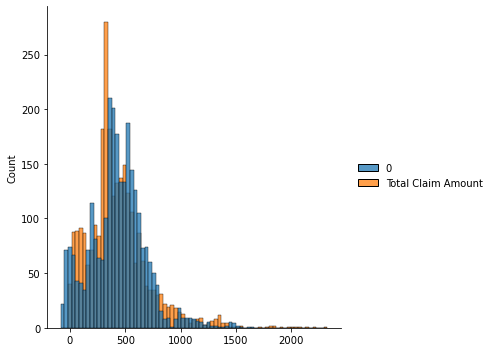

In [83]:
sns.displot([predictions,y_test])
plt.show()

In [63]:
from sklearn import metrics

In [64]:
#MSE
metrics.mean_squared_error(y_test,predictions)

17747.518325211346

In [65]:
#ME
metrics.mean_squared_error(y_test,predictions,squared=False)

133.2198120596608

In [66]:
#RMSE
(metrics.mean_squared_error(y_test,predictions,squared=False))**0.5

11.542088721702878

In [67]:
#MAE
metrics.mean_absolute_error(y_test,predictions)

93.8514819801291

In [68]:
#R2
metrics.r2_score(y_test,predictions)

0.7823354675532654

## Linear model number 1 with statsmodels libary and StandardScaler

In [69]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import metrics

In [70]:
X_ols=sm.add_constant(X)
model_ols=sm.OLS(Y,X_ols).fit()

print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     774.0
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:04:29   Log-Likelihood:                -57001.
No. Observations:                8971   AIC:                         1.141e+05
Df Residuals:                    8931   BIC:                         1.144e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Linear model number 2 with sklearn libary and MinMacScaler

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
#scaling test set
scaler_x2 = MinMaxScaler().fit(x_train)

x_train_scaled2=pd.DataFrame(scaler_x2.transform(x_train),columns=X.columns)
x_train_scaled2.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Coverage,Education,Vehicle Class,Vehicle Size,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_Employed,x2_Medical Leave,x2_Retired,x2_Unemployed,x3_M,x4_Suburban,x4_Urban,x5_Married,x5_Single,x6_Personal Auto,x6_Special Auto,x7_Corporate L2,x7_Corporate L3,x7_Personal L1,x7_Personal L2,x7_Personal L3,x7_Special L1,x7_Special L2,x7_Special L3,x8_Offer2,x8_Offer3,x8_Offer4,x9_Branch,x9_Call Center,x9_Web
0,0.169446,0.977686,0.016949,0.428571,0.515152,0.0,0.125,0.0,0.25,0.0,0.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.050020,0.640202,0.101695,0.257143,0.666667,1.0,0.500,0.5,0.25,0.0,0.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.160070,0.390564,0.008475,0.857143,0.343434,0.0,0.125,0.0,0.25,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.127907,0.000000,0.233051,0.200000,0.575758,0.0,0.125,1.0,0.25,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.008131,0.880757,0.008475,0.428571,0.989899,0.0,0.000,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [73]:
#scaling train set

x_test_scaled2=pd.DataFrame(scaler_x2.transform(x_test),columns=X.columns)
x_test_scaled2.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Coverage,Education,Vehicle Class,Vehicle Size,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_Employed,x2_Medical Leave,x2_Retired,x2_Unemployed,x3_M,x4_Suburban,x4_Urban,x5_Married,x5_Single,x6_Personal Auto,x6_Special Auto,x7_Corporate L2,x7_Corporate L3,x7_Personal L1,x7_Personal L2,x7_Personal L3,x7_Special L1,x7_Special L2,x7_Special L3,x8_Offer2,x8_Offer3,x8_Offer4,x9_Branch,x9_Call Center,x9_Web
0,0.005122,0.000000,0.050847,0.400000,0.393939,0.2,0.000,0.0,0.5,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.059556,0.267261,0.016949,0.514286,0.646465,0.6,0.125,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.099539,0.982107,0.097458,0.057143,0.646465,0.2,0.125,0.5,0.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.073161,0.372361,0.025424,0.257143,0.363636,0.0,0.125,0.0,0.5,0.0,0.5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.084084,0.617177,0.207627,0.171429,0.717172,0.0,0.750,0.0,0.5,0.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [74]:
#Linear Regression
lm_2=linear_model.LinearRegression()
model_2=lm_2.fit(x_train_scaled2,y_train)
predictions_2=lm_2.predict(x_test_scaled2)
round(r2_score(y_test,predictions_2),5)

0.78235

In [75]:
predictions_df2 = pd.DataFrame(predictions_2,columns=["Prediction 2 Total Claim Amount"],index=y_test.index)
predictions_df2.head()

,Prediction 2 Total Claim Amount
Customer,
DQ10761,548.552316
MQ93707,393.485505
DS50601,413.649425
AP95078,362.158451
CW38361,202.737986


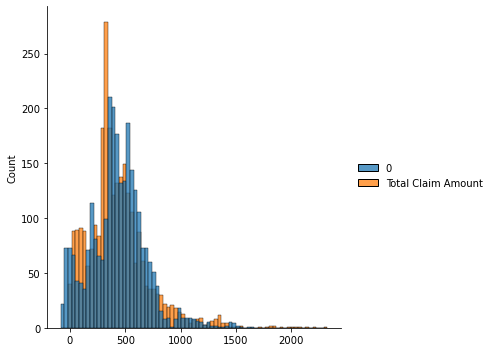

In [84]:
sns.displot([predictions_2,y_test])
plt.show()

## Linear model number 3 with sklearn libary and Normalizer

In [76]:
from sklearn.preprocessing import Normalizer

In [77]:
scaler_x3 = Normalizer().fit(x_train)

x_train_scaled3 = pd.DataFrame(scaler_x3.transform(x_train), columns =X.columns)
x_test_scaled3 = pd.DataFrame(scaler_x3.transform(x_test), columns = X.columns)


In [78]:
lm_3=linear_model.LinearRegression()
model_3=lm_3.fit(x_train_scaled3,y_train)
predictions_3=lm_3.predict(x_test_scaled3)
round(r2_score(y_test,predictions_3),5)

0.43127

In [79]:
predictions_df3 = pd.DataFrame(predictions_3,columns=["Prediction 3 Total Claim Amount"],index=y_test.index)
predictions_df3.head()

,Prediction 3 Total Claim Amount
Customer,
DQ10761,519.919748
MQ93707,469.212040
DS50601,297.817749
AP95078,366.157438
CW38361,323.358805


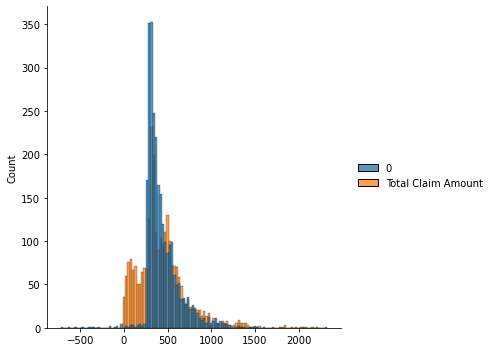

In [85]:
sns.displot([predictions_3,y_test])
plt.show()

### Personal Note (to be clarified later)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Normalizer necessary when using linar regression of sklearn libary? 

sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)

normalizebool, default=False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.


# Lab | Customer Analysis Round 7

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise.
Some approaches you can try in this exercise:

- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in rounds 2 to 7.

**Bonus**: Build a function, from round 2 and round 7, to clean and process the data.

### Explore the data

Done in the round 3.

### Modeling

Description:

- Try to improve the linear regression model.